Base de datos cargada correctamente.

Entrenando el modelo...
Entrenamiento completado.

--- Resultados del Modelo de Árbol de Decisión (Conjunto de Prueba) ---
Eficacia (Accuracy): 0.8319
Precisión (Precision): 0.8089

--- Reporte de Clasificación (Conjunto de Prueba) ---
                 precision    recall  f1-score   support

     Derivación       0.53      0.30      0.38      2428
      Domicilio       0.89      0.96      0.92     14076
Hospitalización       0.51      0.47      0.49      1404

       accuracy                           0.83     17908
      macro avg       0.64      0.58      0.60     17908
   weighted avg       0.81      0.83      0.82     17908


--- Matriz de Confusión (Valores) con el Conjunto de Prueba ---
[[  736  1288   404]
 [  344 13498   234]
 [  316   425   663]]

--- Matriz de Confusión (Valores) con el Conjunto de Datos Completo ---
[[ 3472  6208  2017]
 [ 1697 67766  1317]
 [ 1546  1944  3570]]


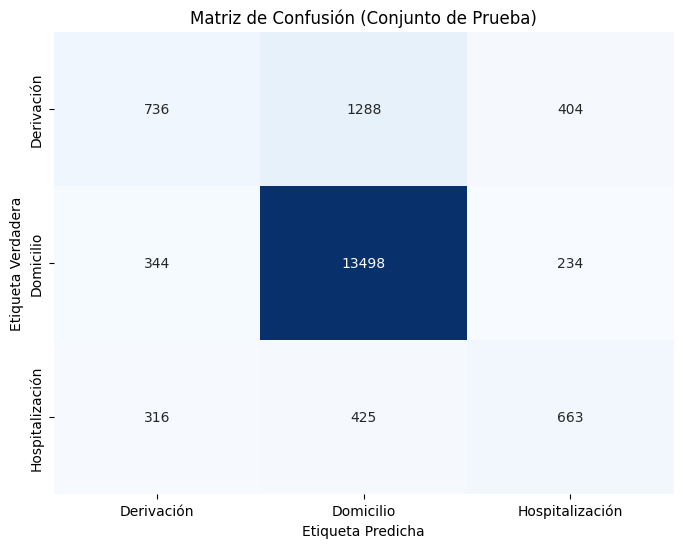

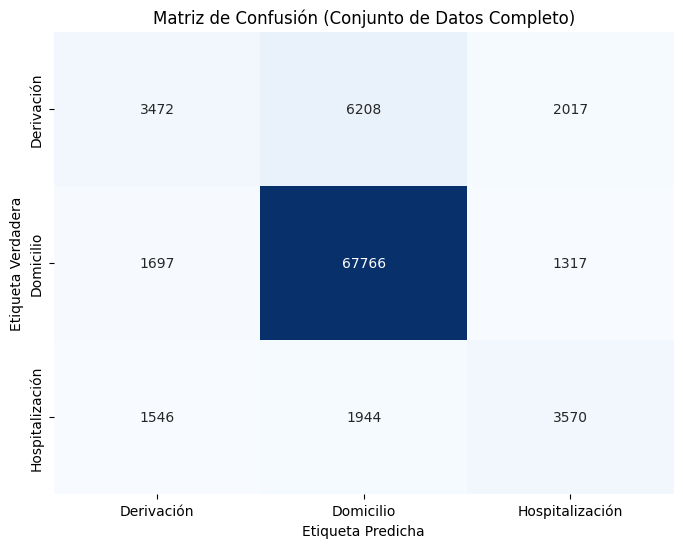

In [1]:
# ======================================================================
# Sección 1: Importación de Bibliotecas
# ======================================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# Sección 2: Carga y Preprocesamiento de Datos
# ======================================================================
# Cargar la base de datos desde el archivo CSV.
# El archivo debe estar en la carpeta 'databases' del mismo directorio.
try:
    df = pd.read_csv('databases/basedatos_202507161527.csv')
    print("Base de datos cargada correctamente.")
except FileNotFoundError:
    print("Error: El archivo 'basedatos_202507161527.csv' no fue encontrado.")
    exit()

# Seleccionar todas las columnas excepto la variable objetivo
X = df.drop('Destino', axis=1)
y = df['Destino']

# Convertir las variables categóricas en variables "dummy" (One-Hot Encoding).
# Los árboles de decisión no pueden procesar datos categóricos directamente.
X = pd.get_dummies(X, drop_first=True)

# Obtener las clases únicas para la variable objetivo para la visualización
clases = np.unique(y)

# Codificar la variable objetivo para que sea numérica
y_encoded = y.astype('category').cat.codes

# ======================================================================
# Sección 3: División de Datos
# ======================================================================
# Dividir los datos en conjuntos de entrenamiento y prueba (80% / 20%).
# Esto es crucial para evaluar la capacidad de generalización del modelo.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# ======================================================================
# Sección 4: Construcción y Entrenamiento del Árbol de Decisión
# ======================================================================
# Se utiliza el clasificador DecisionTreeClassifier de scikit-learn.
# 'criterion'='entropy' se usa para medir la calidad de cada división.
# 'max_depth'=7 se elige para evitar el sobreajuste y mantener la interpretabilidad.
tree_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
print("\nEntrenando el modelo...")
tree_classifier.fit(X_train, y_train)
print("Entrenamiento completado.")

# ======================================================================
# Sección 5: Evaluación del Modelo y Matriz de Confusión
# ======================================================================
# Predecir sobre el conjunto de prueba
y_pred_test = tree_classifier.predict(X_test)

# Calcular y mostrar las métricas de rendimiento con el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)

print("\n--- Resultados del Modelo de Árbol de Decisión (Conjunto de Prueba) ---")
print(f"Eficacia (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")

# Mostrar el reporte de clasificación detallado
print("\n--- Reporte de Clasificación (Conjunto de Prueba) ---")
print(classification_report(y_test, y_pred_test, target_names=clases, zero_division=0))

# Calcular la matriz de confusión para el conjunto de prueba
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("\n--- Matriz de Confusión (Valores) con el Conjunto de Prueba ---")
print(conf_matrix_test)

# Predecir sobre el conjunto de datos completo
y_pred_full = tree_classifier.predict(X)

# Calcular la matriz de confusión para el conjunto de datos completo
conf_matrix_full = confusion_matrix(y_encoded, y_pred_full)
print("\n--- Matriz de Confusión (Valores) con el Conjunto de Datos Completo ---")
print(conf_matrix_full)

# ======================================================================
# Sección 6: Visualización de la Matriz de Confusión
# ======================================================================

def plot_confusion_matrix(cm, classes, title='Matriz de Confusión', cmap=plt.cm.Blues):
    """
    Función para imprimir y dibujar la matriz de confusión como un mapa de calor.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.show()

# Visualizar la matriz de confusión del conjunto de prueba
plot_confusion_matrix(conf_matrix_test, classes=clases, title='Matriz de Confusión (Conjunto de Prueba)')

# Visualizar la matriz de confusión del conjunto de datos completo
plot_confusion_matrix(conf_matrix_full, classes=clases, title='Matriz de Confusión (Conjunto de Datos Completo)')


Base de datos cargada correctamente.

Entrenando el modelo...
Entrenamiento completado.

--- Resultados del Modelo de Árbol de Decisión (Conjunto de Prueba) ---
Eficacia (Accuracy): 0.8337
Precisión (Precision): 0.8111

--- Reporte de Clasificación (Conjunto de Prueba) ---
                 precision    recall  f1-score   support

     Derivación       0.53      0.30      0.39      2428
      Domicilio       0.89      0.96      0.92     14076
Hospitalización       0.52      0.49      0.50      1404

       accuracy                           0.83     17908
      macro avg       0.65      0.58      0.60     17908
   weighted avg       0.81      0.83      0.82     17908


--- Matriz de Confusión (Valores) con el Conjunto de Prueba ---
[[  736  1288   404]
 [  339 13510   227]
 [  302   418   684]]

--- Matriz de Confusión (Valores) con el Conjunto de Datos Completo ---
[[ 3518  6216  1963]
 [ 1633 67865  1282]
 [ 1516  1945  3599]]


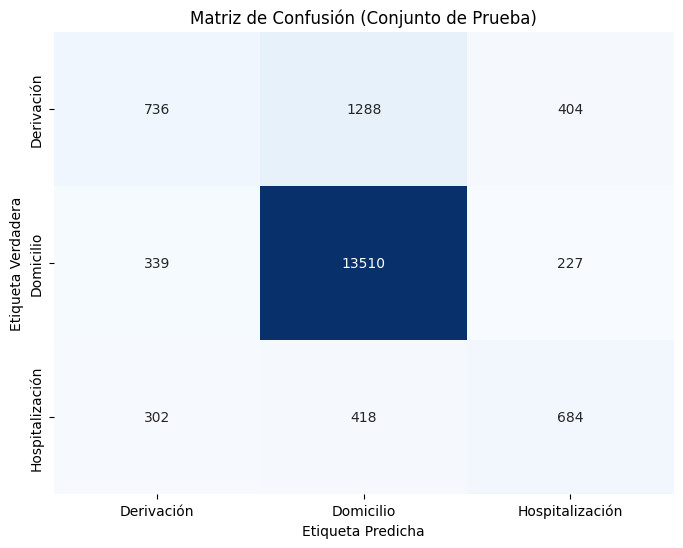

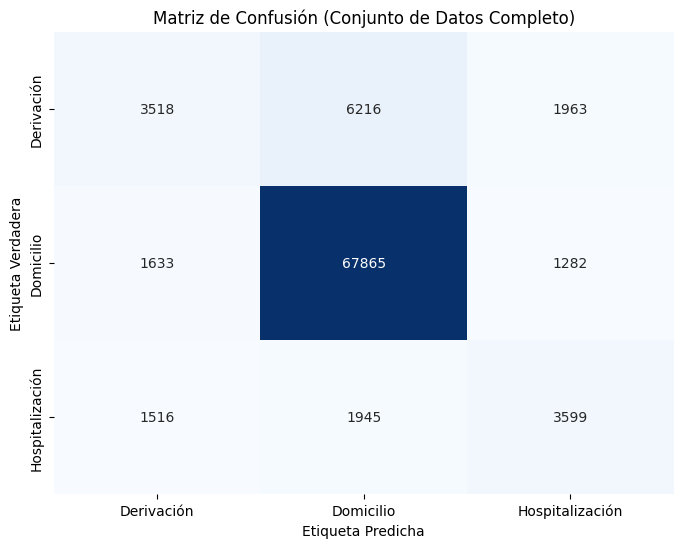

In [2]:
# ======================================================================
# Sección 1: Importación de Bibliotecas
# ======================================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# Sección 2: Carga y Preprocesamiento de Datos
# ======================================================================
# Cargar la base de datos desde el archivo CSV.
# El archivo debe estar en la carpeta 'databases' del mismo directorio.
try:
    df = pd.read_csv('databases/basedatos_202507161527.csv')
    print("Base de datos cargada correctamente.")
except FileNotFoundError:
    print("Error: El archivo 'basedatos_202507161527.csv' no fue encontrado.")
    exit()

# Seleccionar todas las columnas excepto la variable objetivo
X = df.drop('Destino', axis=1)
y = df['Destino']

# Convertir las variables categóricas en variables "dummy" (One-Hot Encoding).
# Los árboles de decisión no pueden procesar datos categóricos directamente.
X = pd.get_dummies(X, drop_first=True)

# Obtener las clases únicas para la variable objetivo para la visualización
clases = np.unique(y)

# Codificar la variable objetivo para que sea numérica
y_encoded = y.astype('category').cat.codes

# ======================================================================
# Sección 3: División de Datos
# ======================================================================
# Dividir los datos en conjuntos de entrenamiento y prueba (80% / 20%).
# Esto es crucial para evaluar la capacidad de generalización del modelo.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# ======================================================================
# Sección 4: Construcción y Entrenamiento del Árbol de Decisión
# ======================================================================
# Se utiliza el clasificador DecisionTreeClassifier de scikit-learn.
# Se cambia el criterio de 'entropy' a 'gini'.
# 'max_depth'=7 se elige para evitar el sobreajuste y mantener la interpretabilidad.
tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
print("\nEntrenando el modelo...")
tree_classifier.fit(X_train, y_train)
print("Entrenamiento completado.")

# ======================================================================
# Sección 5: Evaluación del Modelo y Matriz de Confusión
# ======================================================================
# Predecir sobre el conjunto de prueba
y_pred_test = tree_classifier.predict(X_test)

# Calcular y mostrar las métricas de rendimiento con el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)

print("\n--- Resultados del Modelo de Árbol de Decisión (Conjunto de Prueba) ---")
print(f"Eficacia (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")

# Mostrar el reporte de clasificación detallado
print("\n--- Reporte de Clasificación (Conjunto de Prueba) ---")
print(classification_report(y_test, y_pred_test, target_names=clases, zero_division=0))

# Calcular la matriz de confusión para el conjunto de prueba
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("\n--- Matriz de Confusión (Valores) con el Conjunto de Prueba ---")
print(conf_matrix_test)

# Predecir sobre el conjunto de datos completo
y_pred_full = tree_classifier.predict(X)

# Calcular la matriz de confusión para el conjunto de datos completo
conf_matrix_full = confusion_matrix(y_encoded, y_pred_full)
print("\n--- Matriz de Confusión (Valores) con el Conjunto de Datos Completo ---")
print(conf_matrix_full)

# ======================================================================
# Sección 6: Visualización de la Matriz de Confusión
# ======================================================================

def plot_confusion_matrix(cm, classes, title='Matriz de Confusión', cmap=plt.cm.Blues):
    """
    Función para imprimir y dibujar la matriz de confusión como un mapa de calor.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.show()

# Visualizar la matriz de confusión del conjunto de prueba
plot_confusion_matrix(conf_matrix_test, classes=clases, title='Matriz de Confusión (Conjunto de Prueba)')

# Visualizar la matriz de confusión del conjunto de datos completo
plot_confusion_matrix(conf_matrix_full, classes=clases, title='Matriz de Confusión (Conjunto de Datos Completo)')


Base de datos cargada correctamente.

--- Analizando el modelo con max_depth = 5 ---

Resultados con max_depth = 5:
Eficacia (Accuracy): 0.8301

--- Reporte de Clasificación (Conjunto de Prueba) ---
                 precision    recall  f1-score   support

     Derivación       0.55      0.24      0.33      2428
      Domicilio       0.88      0.96      0.92     14076
Hospitalización       0.48      0.52      0.50      1404

       accuracy                           0.83     17908
      macro avg       0.64      0.57      0.58     17908
   weighted avg       0.81      0.83      0.81     17908


--- Matriz de Confusión (Valores) con el Conjunto de Prueba ---
[[  573  1344   511]
 [  241 13562   273]
 [  233   440   731]]

--- Matriz de Confusión (Valores) con el Conjunto de Datos Completo ---
[[ 2540  6537  2620]
 [ 1188 68060  1532]
 [ 1233  2044  3783]]

--- Analizando el modelo con max_depth = 7 ---

Resultados con max_depth = 7:
Eficacia (Accuracy): 0.8319

--- Reporte de Clasificac

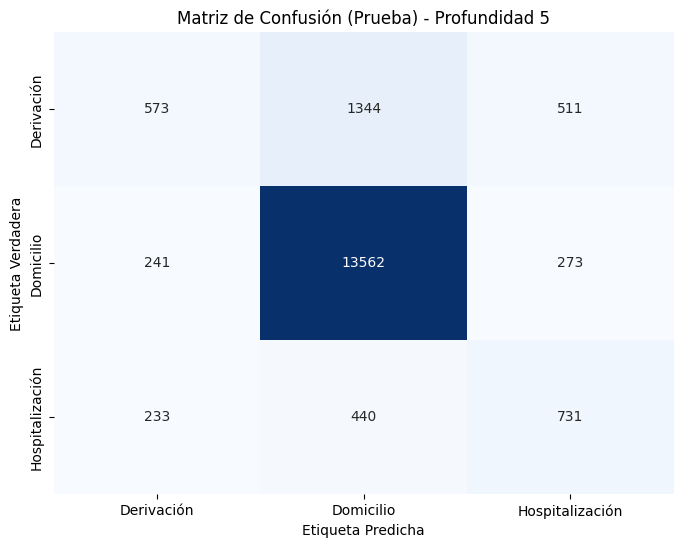

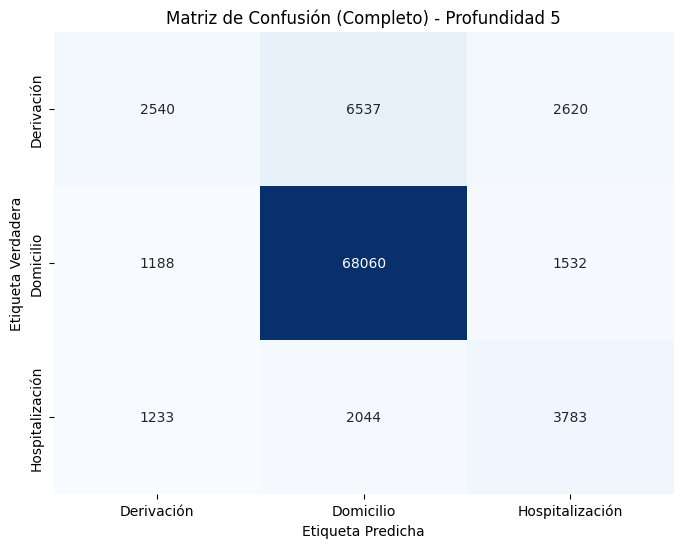

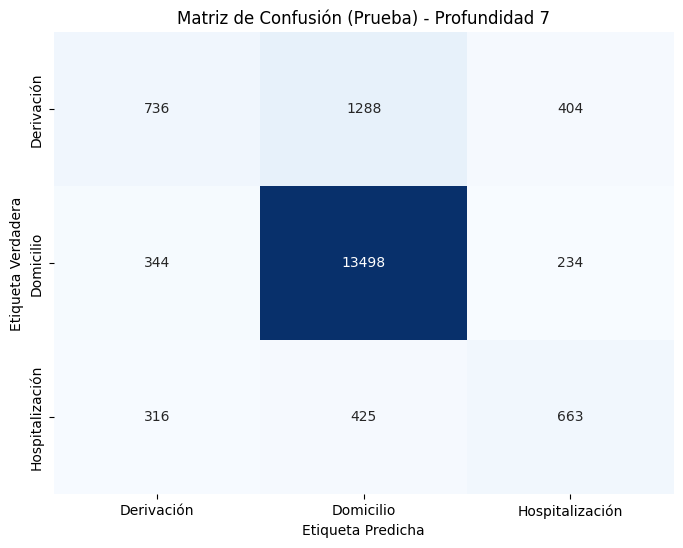

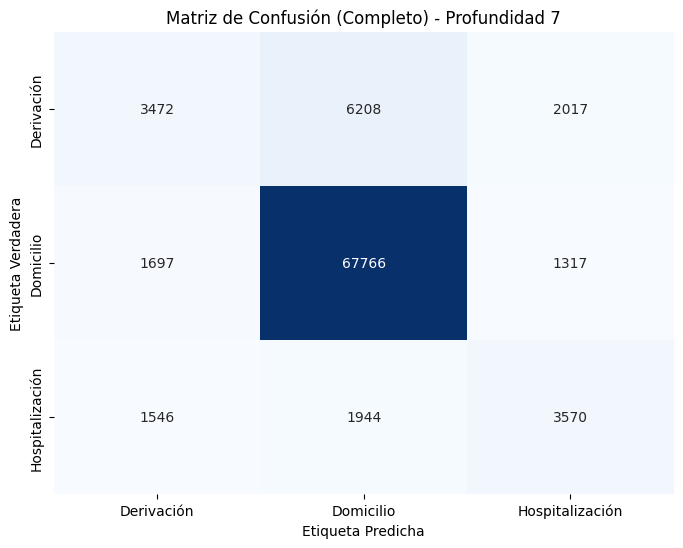

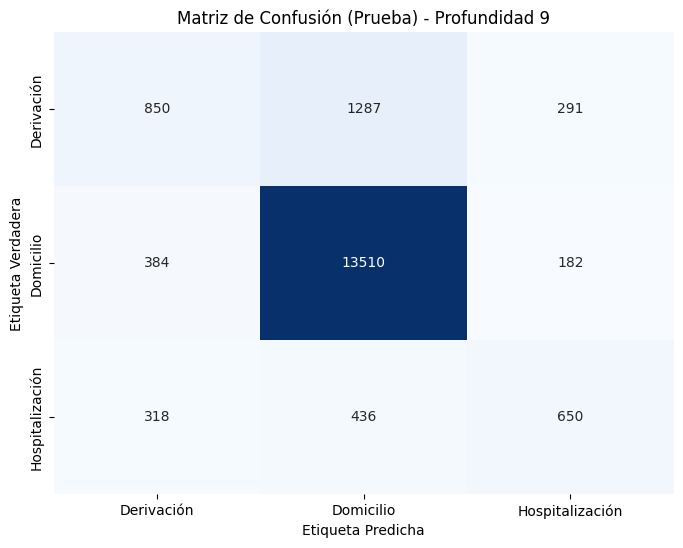

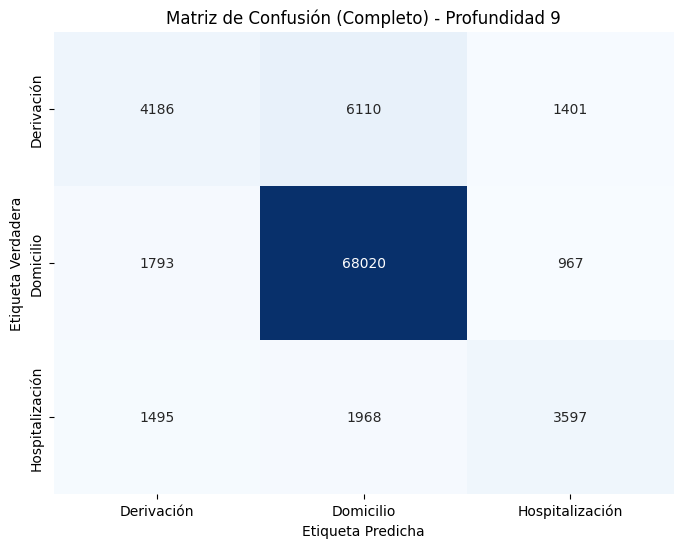

In [5]:
# ======================================================================
# Sección 1: Importación de Bibliotecas
# ======================================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# Sección 2: Carga y Preprocesamiento de Datos
# ======================================================================
# Cargar la base de datos desde el archivo CSV.
# El archivo debe estar en la carpeta 'databases' del mismo directorio.
try:
    df = pd.read_csv('databases/basedatos_202507161527.csv')
    print("Base de datos cargada correctamente.")
except FileNotFoundError:
    print("Error: El archivo 'basedatos_202507161527.csv' no fue encontrado.")
    exit()

# Seleccionar todas las columnas excepto la variable objetivo
X = df.drop('Destino', axis=1)
y = df['Destino']

# Convertir las variables categóricas en variables "dummy" (One-Hot Encoding).
# Los árboles de decisión no pueden procesar datos categóricos directamente.
X = pd.get_dummies(X, drop_first=True)

# Obtener las clases únicas para la variable objetivo para la visualización
classes = np.unique(y)

# Codificar la variable objetivo para que sea numérica
y_encoded = y.astype('category').cat.codes

# ======================================================================
# Sección 3: División de Datos
# ======================================================================
# Dividir los datos en conjuntos de entrenamiento y prueba (80% / 20%).
# Esto es crucial para evaluar la capacidad de generalización del modelo.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# ======================================================================
# Sección 4: Comparación de Modelos con Diferentes Profundidades
# ======================================================================

# Definir las profundidades a probar
depths = [5, 7, 9]
results = []

for depth in depths:
    print(f"\n--- Analizando el modelo con max_depth = {depth} ---")

    # Construcción y entrenamiento del árbol de decisión con el criterio de entropía
    tree_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    tree_classifier.fit(X_train, y_train)

    # Evaluación del Modelo
    y_pred_test = tree_classifier.predict(X_test)
    y_pred_full = tree_classifier.predict(X)

    accuracy_test = accuracy_score(y_test, y_pred_test)
    report_test = classification_report(y_test, y_pred_test, target_names=clases, output_dict=True, zero_division=0)
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)
    conf_matrix_full = confusion_matrix(y_encoded, y_pred_full)

    # Almacenar los resultados
    results.append({
        'Profundidad': depth,
        'Eficacia (Prueba)': accuracy_test,
        'Precisión Ponderada': report_test['weighted avg']['precision'],
        'Recall Ponderado': report_test['weighted avg']['recall'],
        'F1-Score Ponderado': report_test['weighted avg']['f1-score'],
        'Reporte de Clasificación (Prueba)': report_test,
        'Matriz de Confusión (Prueba)': conf_matrix_test,
        'Matriz de Confusión (Completo)': conf_matrix_full
    })

    # Imprimir resultados detallados para cada modelo
    print(f"\nResultados con max_depth = {depth}:")
    print(f"Eficacia (Accuracy): {accuracy_test:.4f}")
    print("\n--- Reporte de Clasificación (Conjunto de Prueba) ---")
    print(classification_report(y_test, y_pred_test, target_names=clases, zero_division=0))
    print("\n--- Matriz de Confusión (Valores) con el Conjunto de Prueba ---")
    print(conf_matrix_test)
    print("\n--- Matriz de Confusión (Valores) con el Conjunto de Datos Completo ---")
    print(conf_matrix_full)

# ======================================================================
# Sección 5: Tabla Comparativa y Visualización
# ======================================================================

# Crear un DataFrame para la tabla comparativa
comparison_df = pd.DataFrame([
    {
        'Profundidad': r['Profundidad'],
        'Eficacia (Prueba)': f"{r['Eficacia (Prueba)']:.4f}",
        'Precisión Ponderada': f"{r['Precisión Ponderada']:.4f}",
        'Recall Ponderado': f"{r['Recall Ponderado']:.4f}",
        'F1-Score Ponderado': f"{r['F1-Score Ponderado']:.4f}"
    } for r in results
])

print("\n\n--- Tabla Comparativa de Resultados ---")
print(comparison_df.to_markdown(index=False))

# Visualizar las matrices de confusión para cada modelo
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    """
    Función para imprimir y dibujar la matriz de confusión como un mapa de calor.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.show()

for r in results:
    plot_confusion_matrix(r['Matriz de Confusión (Prueba)'], classes, f"Matriz de Confusión (Prueba) - Profundidad {r['Profundidad']}")
    plot_confusion_matrix(r['Matriz de Confusión (Completo)'], classes, f"Matriz de Confusión (Completo) - Profundidad {r['Profundidad']}")


El árbol de decisión ha sido guardado como 'arbol_de_decision.png'.


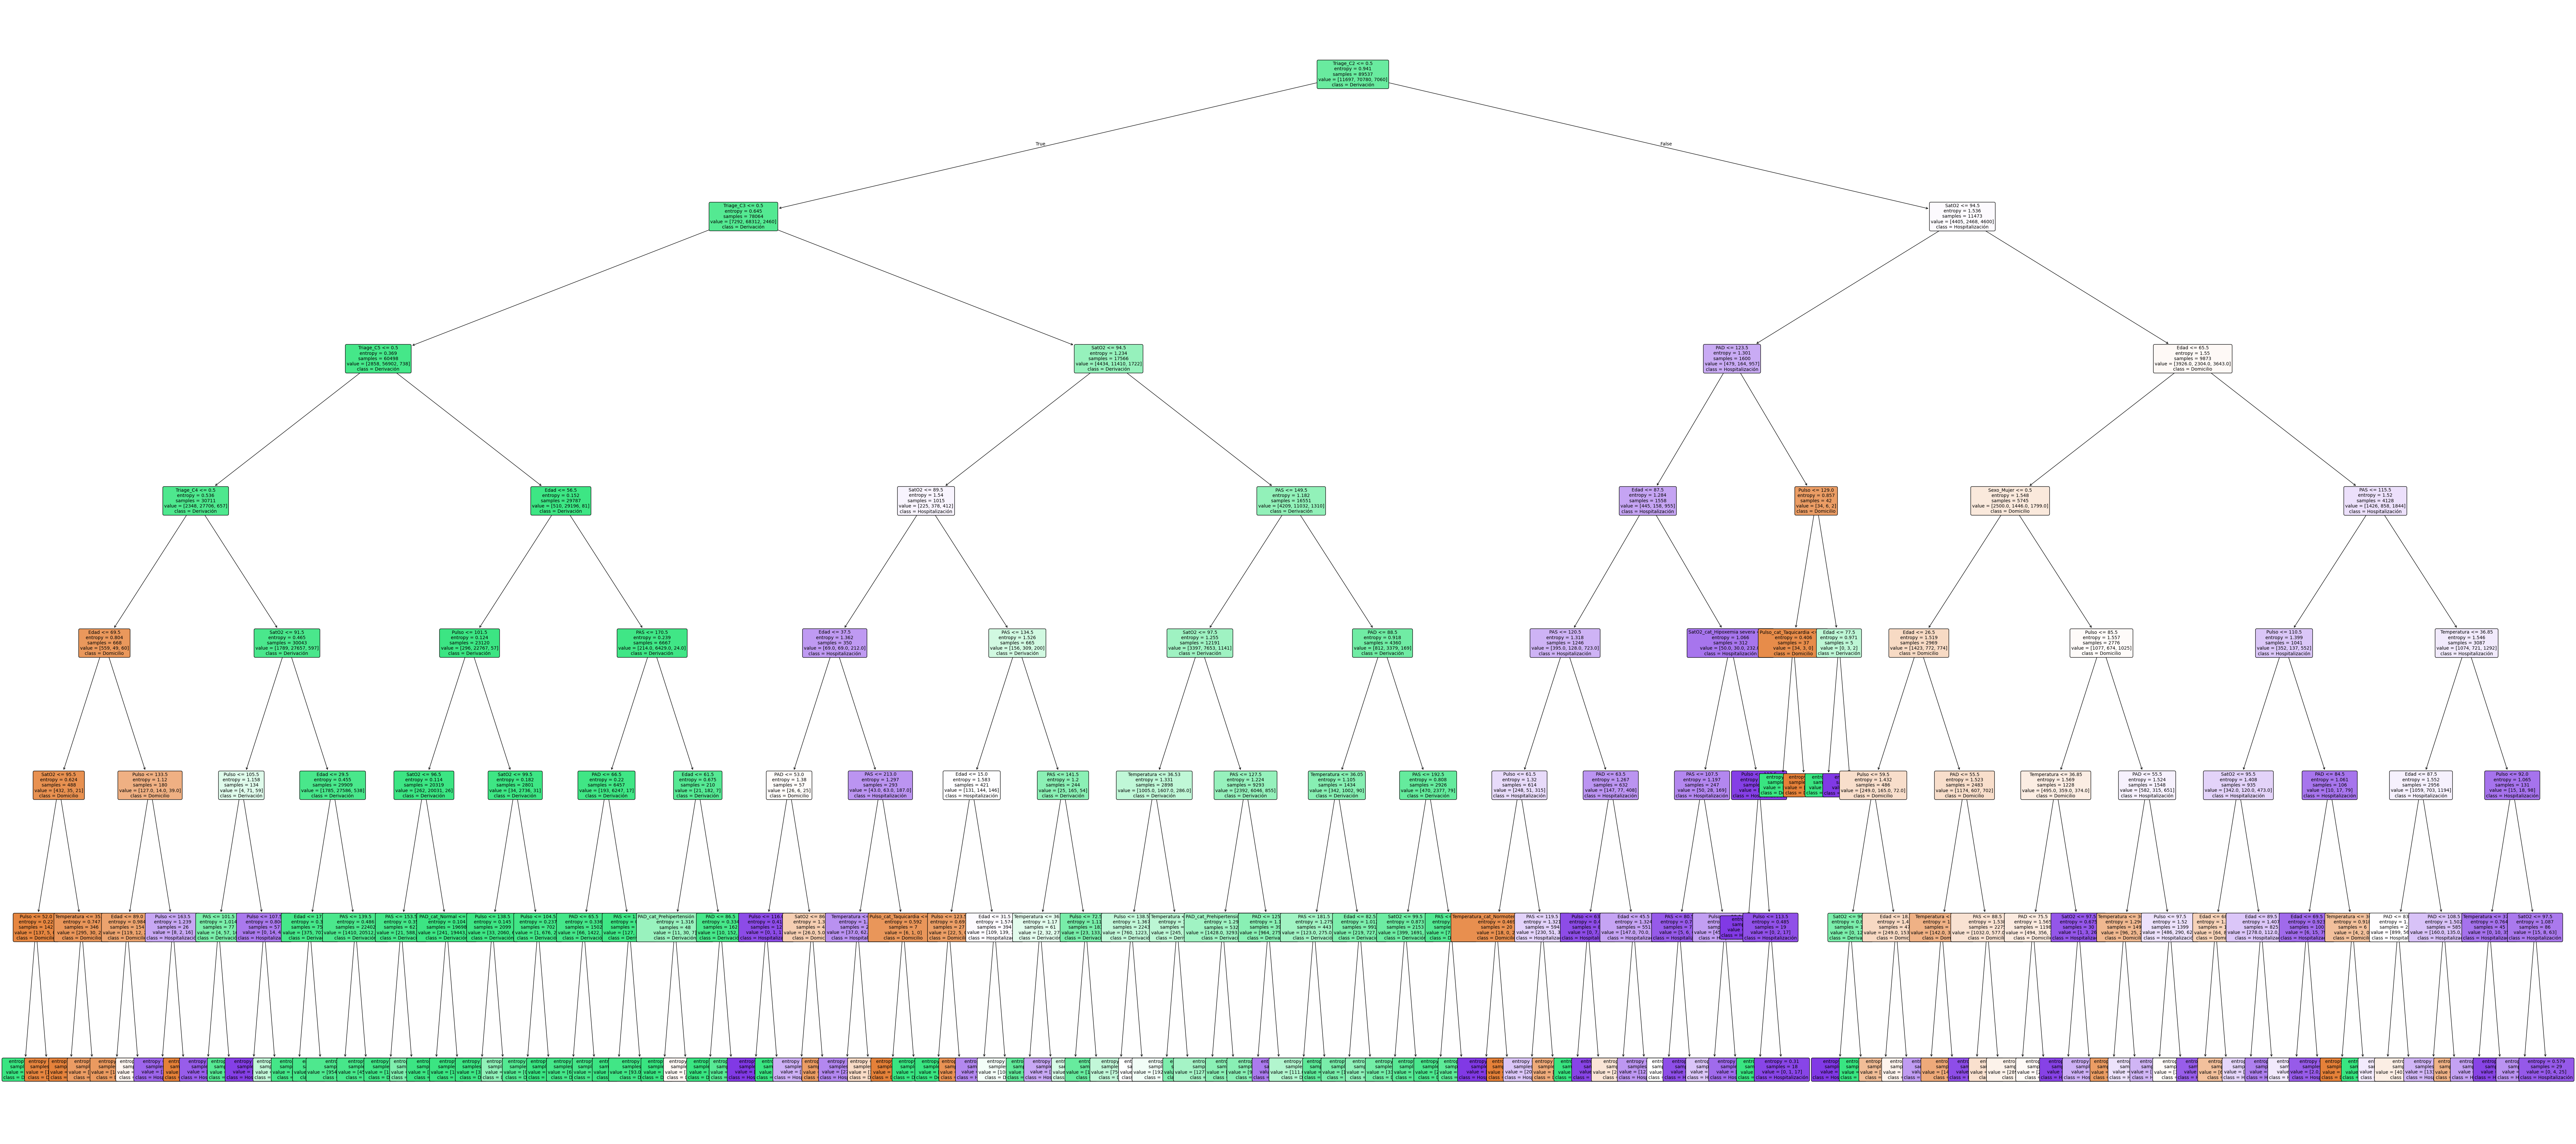

In [9]:
# ======================================================================
# Sección 1: Importación de Bibliotecas
# ======================================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# ======================================================================
# Sección 2: Carga y Preprocesamiento de Datos
# ======================================================================
try:
    df = pd.read_csv('databases/basedatos_202507161527.csv')
except FileNotFoundError:
    print("Error: El archivo no fue encontrado.")
    exit()

# Definir las variables de entrada (X) y la variable objetivo (y)
X = df.drop('Destino', axis=1)
y = df['Destino']

# Convertir variables categóricas de entrada a formato one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Obtener nombres de las características y clases para la visualización
feature_names = X.columns.tolist()
class_names = y.unique().tolist()

# ======================================================================
# Sección 3: Entrenamiento del Modelo
# ======================================================================
# Entrenar el árbol de decisión con una profundidad máxima de 7 y criterio de entropía
tree_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)
tree_classifier.fit(X, y)

# ======================================================================
# Sección 4: Visualización del Árbol
# ======================================================================
# Configurar el tamaño de la figura para una mejor visualización
plt.figure(figsize=(100, 45))

# Generar la visualización del árbol
plot_tree(tree_classifier,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=10)

# Guardar el árbol como una imagen PNG
plt.savefig("arbol_de_decision.png", dpi=300, bbox_inches='tight')
print("El árbol de decisión ha sido guardado como 'arbol_de_decision.png'.")

# Mostrar el gráfico
plt.show()